# Oklahoma quakes

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Load and clean up data

The data was obtained from USGS here: http://earthquake.usgs.gov/earthquakes/search/. It was then run through a PostGIS database to determine the location of the epicenters by state, since USGS does provide specific state locations in its data.

In [4]:
all_quakes = pd.DataFrame.from_csv("quakes.csv", index_col=None, parse_dates=["time", "updated"])

Some earthquakes within the U.S. bounding box don't have epicenters outside any state (e.g., the ocean).

In [5]:
ok_quakes = all_quakes[all_quakes["state"] == "Oklahoma"]
len(ok_quakes)

899

## Charting Earthquake Activity Over Time, By State

In [6]:
data = ok_quakes.set_index("time")["id"].resample("A", how="count")
data

time
1974-12-31      1
1975-12-31      3
1976-12-31      2
1977-12-31      0
1978-12-31      0
1979-12-31      2
1980-12-31      1
1981-12-31      1
1982-12-31      1
1983-12-31      0
1984-12-31      1
1985-12-31      0
1986-12-31      0
1987-12-31      2
1988-12-31      0
1989-12-31      1
1990-12-31      2
1991-12-31      2
1992-12-31      2
1993-12-31      2
1994-12-31      2
1995-12-31      4
1996-12-31      0
1997-12-31      1
1998-12-31      3
1999-12-31      1
2000-12-31      0
2001-12-31      0
2002-12-31      3
2003-12-31      0
2004-12-31      2
2005-12-31      1
2006-12-31      3
2007-12-31      1
2008-12-31      2
2009-12-31     20
2010-12-31     43
2011-12-31     64
2012-12-31     34
2013-12-31    107
2014-12-31    585
Freq: A-DEC, Name: id, dtype: int64

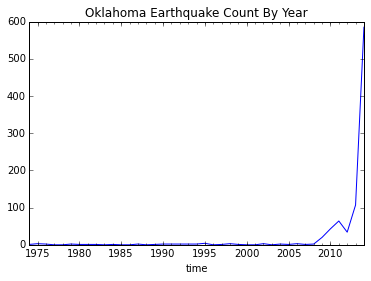

In [7]:
ax = data.plot()
ax.set_title("Oklahoma Earthquake Count By Year")
pass